# Description

In [1]:
# Importing the pandas library
import pandas as pd

In [2]:
#read the dataset using pandas.
df=pd.read_csv(r'C:\Users\pavan\Downloads\IMDB Dataset.csv\IMDB Dataset.csv')

In [3]:
# Observing the first five records.
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['positive'] = df['sentiment'] == 'positive'


In [5]:
df['negative'] = df['sentiment'] == 'negative'

In [6]:
df

,review,sentiment,positive,negative
0,One of the other reviewers has mentioned that ...,positive,True,False
1,A wonderful little production. <br /><br />The...,positive,True,False
2,I thought this was a wonderful way to spend ti...,positive,True,False
3,Basically there's a family where a little boy ...,negative,False,True
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,True,False
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,True,False
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,False,True
49997,I am a Catholic taught in parochial elementary...,negative,False,True
49998,I'm going to have to disagree with the previou...,negative,False,True


In [7]:
# importing the nltk library to download the stopwords
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'same', 'had', 'won', 'me', 'such', 'no', "you'll", 's', 'were', "doesn't", 'to', 'how', 'a', 'why', "haven't", 'than', 'as', "hasn't", 'this', 'him', 'y', 'did', 'again', 'shouldn', 'have', 'most', "didn't", 'below', 'through', 'hasn', 'i', 'once', "it's", 'ma', 'before', "should've", 'doing', 'her', 'if', 'then', 'who', 'of', 'down', 'each', 'its', "shouldn't", 'between', "needn't", 'but', 'above', 'mightn', 'any', 'these', "wouldn't", 't', 'she', 'against', "you're", 'an', 'at', 'for', 'with', 'there', "aren't", 'couldn', "hadn't", "that'll", "she's", 'and', "weren't", 'are', 'all', 'more', 'do', 'after', 'will', 'don', 'his', 'haven', 'over', 'while', 'both', 'he', 've', 'off', 'isn', 'm', 'not', 'wasn', 'wouldn', 'ain', 'does', 'other', "mightn't", "couldn't", 'didn', 'weren', 'hadn', 'am', 'has', 'into', 'your', 'them', 'been', 'which', 'myself', 'be', 'own', 'the', "don't", 'out', 'where', 'so', 'theirs', 'only', "wasn't", 'what', 'some', 'should', "you've", "isn't", 'is', 'unt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Cleaning the text by performing tokenization, removing the stopwords and preprocessing the text.
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['review'].apply(prepare, pipeline=pipeline)


In [9]:
# Counting the frequency of the tokens
from collections import Counter

# Assuming df is already defined
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame(counter.items(), columns=['token', 'freq'])
freq_df = freq_df[freq_df['freq'] >= 1]  # Filtering frequencies >= 1
freq_df = freq_df.sort_values(by='freq', ascending=False)
freq_df.set_index('token', inplace=True)
freq_df.head(10)


,freq
token,
br,201951
movie,86767
film,78396
one,52263
like,39229
good,29148
even,24745
would,24428
time,24184


In [10]:
freq_df['freq']

token
br           201951
movie         86767
film          78396
one           52263
like          39229
              ...  
catalysts         1
igai              1
persueing         1
enkil             1
clatter           1
Name: freq, Length: 135628, dtype: int64

In [11]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


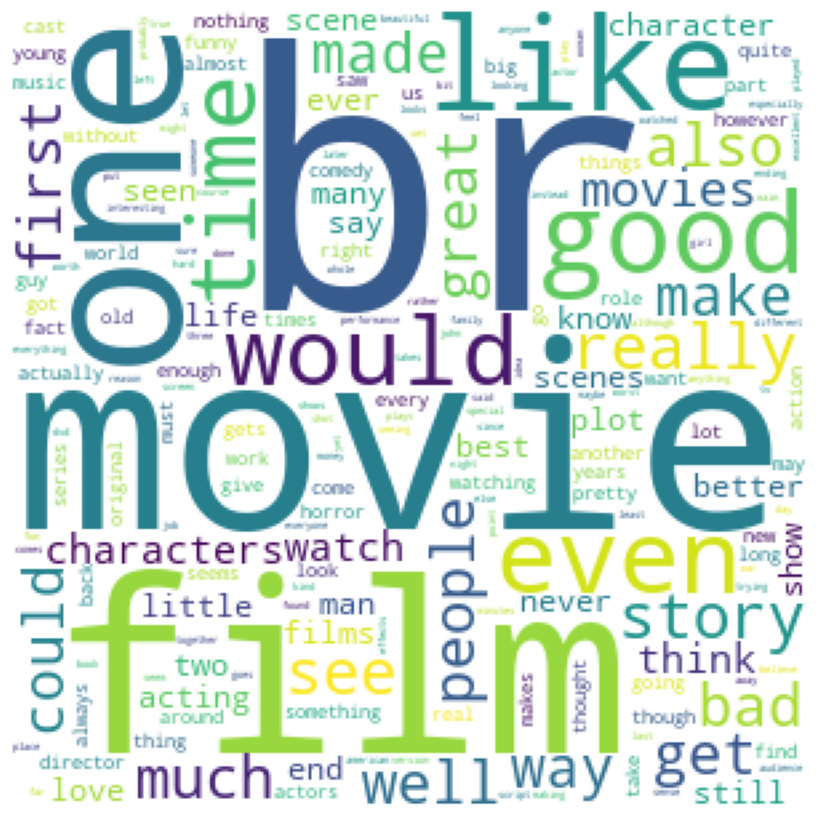

In [11]:
# displays a word cloud visualization from a DataFrame of word frequencies using the WordCloud library and Matplotlib.
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [12]:
# Finding the document frequency and then inverse document frequency
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)


In [13]:
idf_df['idf']


token
pretty          2.265435
crooked         6.442441
due             3.516717
dodgy           6.431142
well            1.369258
                 ...    
jossi          10.919778
oh-so-hard     10.919778
effortful      10.919778
french-only    10.919778
clatter        10.919778
Name: idf, Length: 135628, dtype: float64

In [14]:
# Multiplying the term frequency and inverse document frequency
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
br,201951,128801.481176
movie,86767,52064.586124
film,78396,54508.329604
one,52263,35415.619184
like,39229,34712.479339


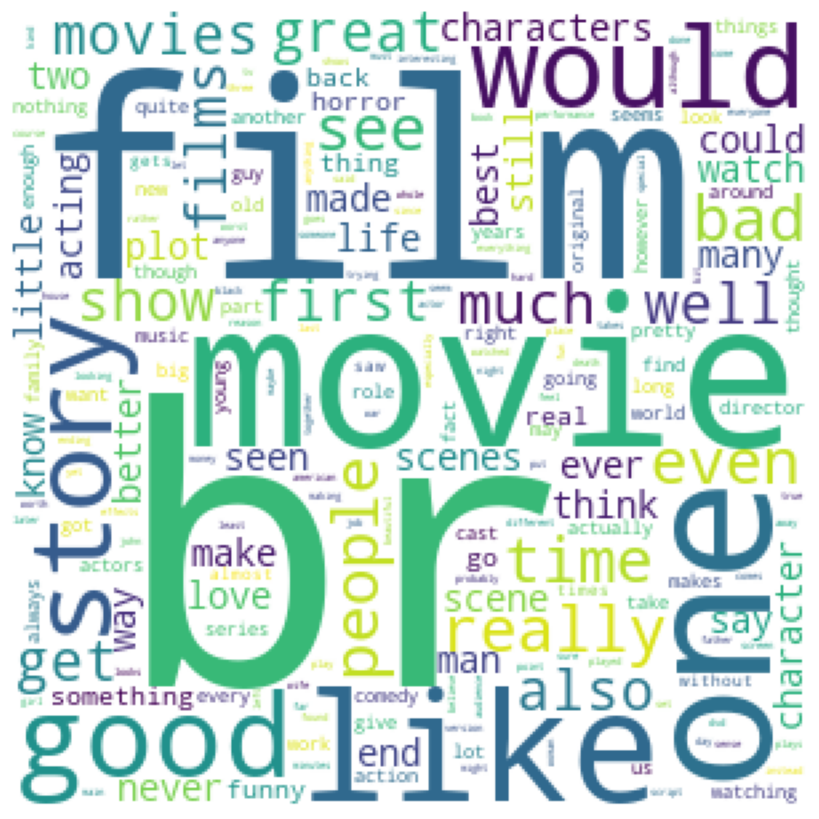

In [15]:
# displays a word cloud visualization from a DataFrame of product of term frequency and the inverse document frequency using the WordCloud library and Matplotlib.
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [16]:
# calculates the count of specific keywords within a list of tokens and returns a list of counts corresponding to each keyword.
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]



In [17]:
#count_keywords_by function calculates the sum of keyword counts grouped by a specified column in the DataFrame.
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

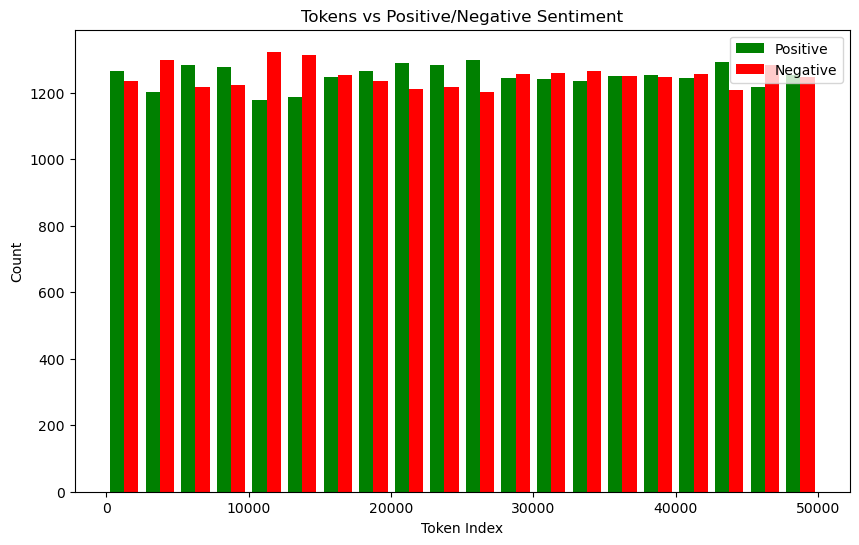

In [20]:
import matplotlib.pyplot as plt

# Plotting histogram for tokens vs positive/negative sentiment
plt.figure(figsize=(10, 6))
plt.hist([df[df['positive'] == True].index, df[df['negative'] == True].index], color=['green', 'red'], bins=20, label=['Positive', 'Negative'])
plt.title('Tokens vs Positive/Negative Sentiment')
plt.xlabel('Token Index')
plt.ylabel('Count')
plt.legend()
plt.show()


